In [1]:
import vtk
import numpy as np
from vtk.util.numpy_support import *
from pathlib import Path
import matplotlib.pyplot as plt


In [2]:

def vtk_results_to_np(results_vtm):

	# read file for steady state flow
	reader = vtk.vtkXMLMultiBlockDataReader()
	reader.SetFileName(Path(results_vtm).absolute().as_posix())
	reader.Update()
	data = reader.GetOutput()
	data_iterator = data.NewIterator()
	img_data = data_iterator.GetCurrentDataObject() 

	point_data = img_data.GetPointData()
	velocity_array_data = point_data.GetArray(0)
	pressure_array_data = point_data.GetArray(1)
	velocity_np_array = vtk_to_numpy(velocity_array_data)
	pressure_np_array = vtk_to_numpy(pressure_array_data)
	img_shape = img_data.GetExtent()#.GetWholeExtent()
	velocity_np_shape = [img_shape[3] - img_shape[2] + 1, img_shape[1] - img_shape[0] + 1, 2]
	pressure_np_shape = [img_shape[3] - img_shape[2] + 1, img_shape[1] - img_shape[0] + 1, 1]
	velocity_np_array = velocity_np_array.reshape(velocity_np_shape)
	pressure_np_array = pressure_np_array.reshape(pressure_np_shape)
	steady_flow_array = np.concatenate([velocity_np_array, pressure_np_array], axis=2)

	return steady_flow_array


In [3]:

def vtk_geom_to_np(geom_vtm):
	reader = vtk.vtkXMLMultiBlockDataReader()
	reader.SetFileName(Path(geom_vtm).absolute().as_posix())
	reader.Update()
	data = reader.GetOutput()
	data_iterator = data.NewIterator()
	img_data = data_iterator.GetCurrentDataObject() 
	point_data = img_data.GetPointData()
	array_data = point_data.GetArray(0)
	np_array = vtk_to_numpy(array_data)
	img_shape = img_data.GetExtent()#.GetWholeExtent()
	np_shape = [img_shape[3] - img_shape[2] + 1, img_shape[1] - img_shape[0] + 1, 1]
	geometry_array = np_array.reshape(np_shape)

	return geometry_array


In [4]:

pathlist = Path('tmp').glob('**/*.vtm')
imp = ['geometry','bstep2d']
geoms = []
results = []
for path in pathlist:
     #print(path)
     path_parts = path.parts
     if 'geometry' in path.as_posix():
     	geoms.append(vtk_geom_to_np( path.as_posix() ))
     if 'bstep2d_iT0100000' in path.as_posix():
     	results.append(vtk_results_to_np( path.as_posix() )) 

# np_results = []
#print(geoms[0].shape)
print(results[0].shape)
# for g,r in zip(geoms,results):
# 	np_results.append(vtk_to_np(r))

# print(np_results[0].shape())

(44, 223, 3)


In [6]:
geoms[0].shape#[0,:,:]

(44, 223, 1)

TypeError: Invalid shape (44, 223, 1) for image data

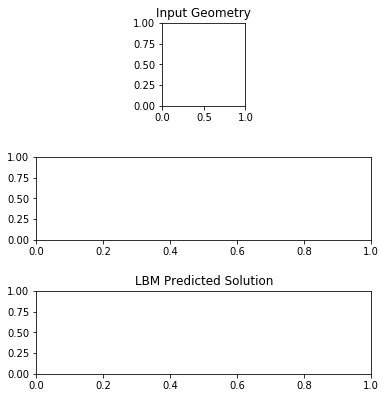

In [17]:
fig, axs = plt.subplots(3, figsize=(6,6))
fig.tight_layout(pad=3.0)

axs[0].axes.set_title('Input Geometry')
#axs[1].axes.set_title('Machine Predicted Solution')
axs[2].axes.set_title('LBM Predicted Solution')

geom = axs[0].imshow(geoms[0] )
#predicted = axs[1].imshow( predicted_steady_flow[i,:,:,0], animated=True)
LBM = axs[2].imshow( results[0,:,:,0] )
    
an = axs[0].annotate('Test Case: {}'.format(i), xy=(0.5, -1.5))
    
ims.append([geom, predicted, LBM, an])



#ani.save('Predictions.mp4')

plt.show()